In [24]:
import os
import numpy as np
import matplotlib.pyplot as plt
from pydantic import validate_call, Field
from typing import Annotated, Sequence
from scipy.interpolate import make_interp_spline
import matplotlib.cm as cm
import matplotlib.colors as mcolors
from scipy.stats import (
    bernoulli, binom, hypergeom, geom, nbinom, poisson, betabinom, multinomial, 
    uniform, norm, expon, gamma, beta, weibull_min, pareto, cauchy, logistic, lognorm, t, chi2, multivariate_normal, dirichlet
)

OUT_DIR = os.path.join(os.path.abspath(""), "pmfs_and_pdfs")
COLOR_PALETTE = [
    "#1f77b4", "#ff7f0e", "#2ca02c", "#d62728", "#9467bd",
    "#8c564b", "#e377c2", "#7f7f7f", "#bcbd22", "#17becf"
]

# Discrete

In [25]:
def check_params(*params):
    param_len = None
    for param in params:
        if param_len is None:
            param_len = len(param) if isinstance(param, Sequence) else 1
        else:
            current_len = len(param) if isinstance(param, Sequence) else 1
            if current_len != 1 and current_len != param_len:
                raise ValueError("All parameters must be of the same length or scalars.")
    # return param_len

# ──────────────────────────────────────────────
# BERNOULLI
# ──────────────────────────────────────────────
@validate_call
def plot_bernoulli_pmf(
    p: float | Sequence[float],
    dark: bool = True,
    out: bool | str = True,
    show: bool = True
):
    p_vals = np.atleast_1d(p)
    if np.any((p_vals <= 0) | (p_vals >= 1)):
        raise ValueError("All p must be in (0, 1).")

    plt.style.use("dark_background") if dark else plt.style.use("default")
    plt.figure(figsize=(6, 4))

    for i, p_i in enumerate(p_vals):
        x = [0, 1]
        pmf = bernoulli.pmf(x, p_i)
        color = COLOR_PALETTE[i % len(COLOR_PALETTE)]
        label = f"p={p_i:.2f}"
        plt.plot(x, pmf, marker='o', linestyle='None', color=color, label=label)

    plt.xlabel("x")
    plt.ylabel("P(X = x)")
    plt.title("Bernoulli PMF")
    plt.legend(frameon=False)
    plt.tight_layout()

    if out:
        if out is True:
            out = f"{OUT_DIR}/bernoulli_pmf.pdf"
        if os.path.dirname(out):
            os.makedirs(os.path.dirname(out), exist_ok=True)
        plt.savefig(out, bbox_inches="tight")
    plt.show() if show else plt.close()

# ──────────────────────────────────────────────
# Binomial
# ──────────────────────────────────────────────
@validate_call
def plot_binomial_pmf(
    n: int | Sequence[int],
    p: float | Sequence[float],
    dark: bool = True,
    out: bool | str = True,
    show: bool = True
):
    # Convert to lists for uniform iteration
    n_vals = np.atleast_1d(n)
    p_vals = np.atleast_1d(p)
    check_params(n_vals, p_vals)

    # Setup plot style
    plt.style.use("dark_background") if dark else plt.style.use("default")
    plt.figure(figsize=(8, 5))

    for i in range(len(n_vals)):
        n_i = n_vals[i]
        p_i = p_vals[i]
        x = np.arange(0, n_i + 1)  # support
        pmf = binom.pmf(x, n_i, p_i)
        label = f"n={n_i}, p={p_i:.2f}"
        color = COLOR_PALETTE[i % len(COLOR_PALETTE)]
        plt.plot(x, pmf, marker='o', linestyle='-', color=color, label=label)

    plt.xlabel("x")
    plt.ylabel("P(X = x)")
    plt.legend(frameon=False)
    plt.tight_layout()

    if out:
        if out is True:
            out = f"{OUT_DIR}/binomial_pmf.pdf"
        if os.path.dirname(out):
            os.makedirs(os.path.dirname(out), exist_ok=True)
        plt.savefig(out, bbox_inches="tight")
    plt.show() if show else plt.close()

# ──────────────────────────────────────────────
# HYPERGEOMETRIC
# ──────────────────────────────────────────────
@validate_call
def plot_hypergeometric_pmf(
    M: int | Sequence[int],
    K: int | Sequence[int],
    n: int | Sequence[int],
    dark: bool = True,
    out: bool | str = True,
    show: bool = True
):
    M_vals = np.atleast_1d(M)
    K_vals = np.atleast_1d(K)
    n_vals = np.atleast_1d(n)

    if np.any(M_vals <= 0) or np.any(K_vals <= 0) or np.any(n_vals <= 0):
        raise ValueError("All M, K, n must be > 0.")

    plt.style.use("dark_background") if dark else plt.style.use("default")
    plt.figure(figsize=(8, 5))

    for i in range(len(M_vals)):
        M_i = M_vals[i % len(M_vals)]
        K_i = K_vals[i % len(K_vals)]
        n_i = n_vals[i % len(n_vals)]
        x = np.arange(max(0, n_i + K_i - M_i), min(K_i, n_i) + 1)
        pmf = hypergeom.pmf(x, M_i, K_i, n_i)
        color = COLOR_PALETTE[i % len(COLOR_PALETTE)]
        label = f"M={M_i}, K={K_i}, n={n_i}"
        plt.plot(x, pmf, marker="o", linestyle="-", color=color, label=label)

    plt.xlabel("x")
    plt.ylabel("P(X = x)")
    plt.title("Hypergeometric PMF")
    plt.legend(frameon=False)
    plt.tight_layout()

    if out:
        if out is True:
            out = f"{OUT_DIR}/hypergeometric_pmf.pdf"
        if os.path.dirname(out):
            os.makedirs(os.path.dirname(out), exist_ok=True)
        plt.savefig(out, bbox_inches="tight")
    plt.show() if show else plt.close()

# ──────────────────────────────────────────────
# GEOMETRIC
# ──────────────────────────────────────────────
@validate_call
def plot_geometric_pmf(
    p: float | Sequence[float],
    dark: bool = True,
    out: bool | str = True,
    show: bool = True
):
    p_vals = np.atleast_1d(p)
    if np.any((p_vals <= 0) | (p_vals >= 1)):
        raise ValueError("All p must be in (0, 1).")

    plt.style.use("dark_background") if dark else plt.style.use("default")
    plt.figure(figsize=(8, 5))

    for i, p_i in enumerate(p_vals):
        x = np.arange(1, 21)
        pmf = geom.pmf(x, p_i)
        color = COLOR_PALETTE[i % len(COLOR_PALETTE)]
        label = f"p={p_i:.2f}"
        plt.plot(x, pmf, marker="o", linestyle="-", color=color, label=label)

    plt.xlabel("x")
    plt.ylabel("P(X = x)")
    plt.legend(frameon=False)
    plt.tight_layout()

    if out:
        if out is True:
            out = f"{OUT_DIR}/geometric_pmf.pdf"
        if os.path.dirname(out):
            os.makedirs(os.path.dirname(out), exist_ok=True)
        plt.savefig(out, bbox_inches="tight")
    plt.show() if show else plt.close()

# ──────────────────────────────────────────────
# NEGATIVE BINOMIAL
# ──────────────────────────────────────────────
@validate_call
def plot_negativebinomial_pmf(
    r: int | Sequence[int],
    p: float | Sequence[float],
    x_max: int = 20,
    dark: bool = True,
    out: bool | str = True,
    show: bool = True
):
    r_vals = np.atleast_1d(r)
    p_vals = np.atleast_1d(p)
    if np.any(r_vals <= 0) or np.any((p_vals <= 0) | (p_vals >= 1)):
        raise ValueError("r > 0 and all p ∈ (0,1).")

    plt.style.use("dark_background") if dark else plt.style.use("default")
    plt.figure(figsize=(8, 5))

    for i in range(len(r_vals)):
        r_i = r_vals[i % len(r_vals)]
        p_i = p_vals[i % len(p_vals)]
        x = np.arange(0, x_max + 1)
        pmf = nbinom.pmf(x, r_i, p_i)
        label = f"r={r_i}, p={p_i:.2f}"
        color = COLOR_PALETTE[i % len(COLOR_PALETTE)]
        plt.plot(x, pmf, marker="o", linestyle="-", color=color, label=label)

    plt.xlabel("x")
    plt.ylabel("P(X = x)")
    plt.legend(frameon=False)
    plt.tight_layout()

    if out:
        if out is True:
            out = f"{OUT_DIR}/negativebinomial_pmf.pdf"
        if os.path.dirname(out):
            os.makedirs(os.path.dirname(out), exist_ok=True)
        plt.savefig(out, bbox_inches="tight")
    plt.show() if show else plt.close()

# ──────────────────────────────────────────────
# POISSON
# ──────────────────────────────────────────────
@validate_call
def plot_poisson_pmf(
    lam: float | Sequence[float],
    x_max: int = 20,
    dark: bool = True,
    out: bool | str = True,
    show: bool = True
):
    lam_vals = np.atleast_1d(lam)
    if np.any(lam_vals <= 0):
        raise ValueError("All λ must be > 0.")

    plt.style.use("dark_background") if dark else plt.style.use("default")
    plt.figure(figsize=(8, 5))

    for i, lam_i in enumerate(lam_vals):
        x = np.arange(0, x_max + 1)
        pmf = poisson.pmf(x, lam_i)
        color = COLOR_PALETTE[i % len(COLOR_PALETTE)]
        plt.plot(x, pmf, marker="o", linestyle="-", color=color, label=f"λ={lam_i:.2f}")

    plt.xlabel("x")
    plt.ylabel("P(X = x)")
    plt.legend(frameon=False)
    plt.tight_layout()

    if out:
        if out is True:
            out = f"{OUT_DIR}/poisson_pmf.pdf"
        if os.path.dirname(out):
            os.makedirs(os.path.dirname(out), exist_ok=True)
        plt.savefig(out, bbox_inches="tight")
    plt.show() if show else plt.close()

# ──────────────────────────────────────────────
# DISCRETE UNIFORM
# ──────────────────────────────────────────────
@validate_call
def plot_discrete_uniform_pmf(
    a: int | Sequence[int],
    b: int | Sequence[int],
    dark: bool = True,
    out: bool | str = True,
    show: bool = True
):
    a_vals = np.atleast_1d(a)
    b_vals = np.atleast_1d(b)
    if len(a_vals) != len(b_vals):
        raise ValueError("a and b sequences must match length.")

    plt.style.use("dark_background") if dark else plt.style.use("default")
    plt.figure(figsize=(8, 5))

    for i in range(len(a_vals)):
        a_i = a_vals[i]
        b_i = b_vals[i]
        if b_i <= a_i:
            raise ValueError("Each b must be > a.")
        x = np.arange(a_i, b_i + 1)
        pmf = np.ones_like(x) / len(x)
        color = COLOR_PALETTE[i % len(COLOR_PALETTE)]
        plt.plot(x, pmf, marker="o", linestyle=None, color=color, label=f"a={a_i}, b={b_i}")

    plt.xlabel("x")
    plt.ylabel("P(X = x)")
    plt.legend(frameon=False)
    plt.tight_layout()

    if out:
        if out is True:
            out = f"{OUT_DIR}/discrete_uniform_pmf.pdf"
        if os.path.dirname(out):
            os.makedirs(os.path.dirname(out), exist_ok=True)
        plt.savefig(out, bbox_inches="tight")
    plt.show() if show else plt.close()

# ──────────────────────────────────────────────
# BETA BINOMIAL
# ──────────────────────────────────────────────
@validate_call
def plot_betabinomial_pmf(
    n: int | Sequence[int],
    a: float | Sequence[float],
    b: float | Sequence[float],
    dark: bool = True,
    out: bool | str = True,
    show: bool = True
):
    n_vals = np.atleast_1d(n)
    a_vals = np.atleast_1d(a)
    b_vals = np.atleast_1d(b)
    if np.any(n_vals <= 0) or np.any(a_vals <= 0) or np.any(b_vals <= 0):
        raise ValueError("All n, a, b must be > 0.")

    plt.style.use("dark_background") if dark else plt.style.use("default")
    plt.figure(figsize=(8, 5))

    for i in range(len(n_vals)):
        n_i = n_vals[i % len(n_vals)]
        a_i = a_vals[i % len(a_vals)]
        b_i = b_vals[i % len(b_vals)]
        x = np.arange(0, n_i + 1)
        pmf = betabinom.pmf(x, n_i, a_i, b_i)
        color = COLOR_PALETTE[i % len(COLOR_PALETTE)]
        plt.plot(x, pmf, marker="o", linestyle="-", color=color,
                 label=f"n={n_i}, a={a_i:.2f}, b={b_i:.2f}")

    plt.xlabel("x")
    plt.ylabel("P(X = x)")
    plt.legend(frameon=False)
    plt.tight_layout()

    if out:
        if out is True:
            out = f"{OUT_DIR}/betabinomial_pmf.pdf"
        if os.path.dirname(out):
            os.makedirs(os.path.dirname(out), exist_ok=True)
        plt.savefig(out, bbox_inches="tight")
    plt.show() if show else plt.close()


@validate_call
def plot_multinomial_pmf(
    n: Annotated[int, Field(gt=0)],
    p1: Annotated[float, Field(gt=0, lt=1)],
    p2: Annotated[float, Field(gt=0, lt=1)],
    note=None,
    dark=True,
    out=True,
    show=True
):
    # Ensure probabilities sum to ≤ 1
    if p1 + p2 >= 1:
        raise ValueError("p1 + p2 must be < 1 (since p3 = 1 - p1 - p2).")

    p3 = 1 - p1 - p2
    dist = multinomial(n=n, p=[p1, p2, p3])
    title = f"Multinomial: n={n}, p=[{p1:.2f}, {p2:.2f}, {p3:.2f}]"
    if note:
        title += f"\n({note})"

    # Create grid of (x1, x2) points
    x1 = np.arange(0, n + 1)
    x2 = np.arange(0, n + 1)
    X1, X2 = np.meshgrid(x1, x2)

    # Compute valid PMF values (where x1 + x2 <= n)
    mask = (X1 + X2) <= n
    X1_valid = X1[mask]
    X2_valid = X2[mask]
    X3_valid = n - X1_valid - X2_valid

    pmf = dist.pmf(np.stack([X1_valid, X2_valid, X3_valid], axis=1))

    # 3D surface plot
    if dark:
        plt.style.use('dark_background')  # go to dark mode
    fig = plt.figure(figsize=(5, 4))
    ax = fig.add_subplot(111, projection='3d')
    # Normalize PMF values to [0,1] for colormap
    norm = mcolors.Normalize(vmin=np.min(pmf), vmax=np.max(pmf))
    colors = cm.viridis(norm(pmf))  # try "plasma", "inferno", etc.

    # 3D bar plot with color-coded heights
    ax.bar3d(
        X1_valid, X2_valid, np.zeros_like(pmf),
        dx=0.8, dy=0.8, dz=pmf,
        color=colors, alpha=0.9, shade=True
    )

    # Add colorbar for reference
    mappable = cm.ScalarMappable(norm=norm, cmap=cm.viridis)
    mappable.set_array(pmf)
    fig.colorbar(mappable, ax=ax, shrink=0.6, pad=0.2, label="P(X₁, X₂)")

    ax.set_xlabel("$x_1$")
    ax.set_ylabel("$x_2$")
    ax.set_zlabel("$P(X_1=x_1, X_2=x_2)$")
    ax.set_title(title, pad=10)

    if dark:
        plt.style.use('default')  # revert back

    # Save output
    if out is True:
        out = f"{OUT_DIR}/multinomial_pmf_n{n}_p{p1:.2f}_{p2:.2f}".replace(".", "") + ".pdf"
    if out:
        if os.path.dirname(out):
            os.makedirs(os.path.dirname(out), exist_ok=True)
        plt.savefig(out, bbox_inches="tight")

    if show:
        plt.show()
    else:
        plt.close()

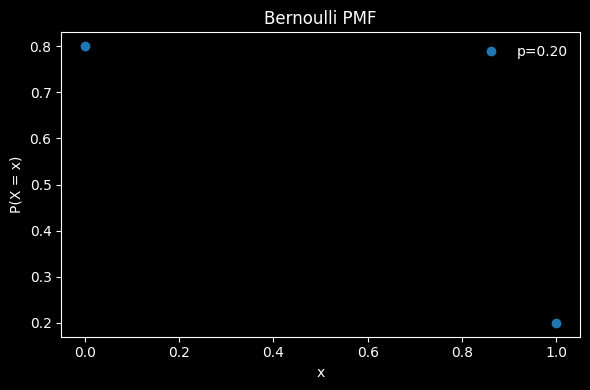

In [26]:
plot_bernoulli_pmf(p=0.2)

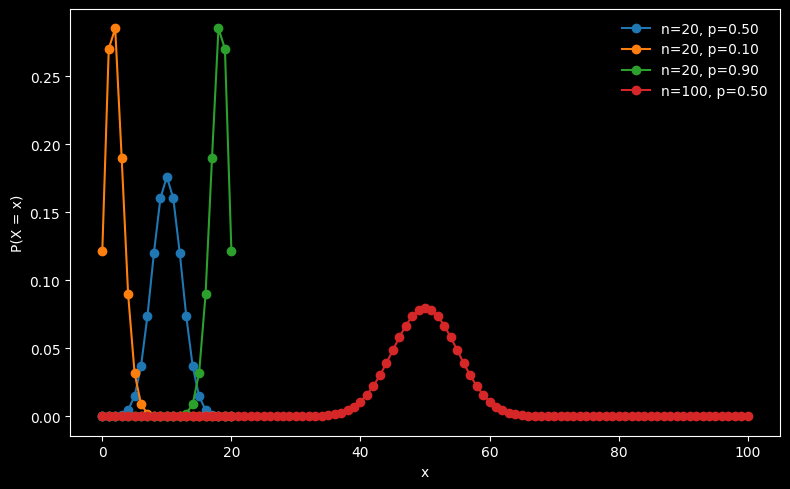

In [29]:
plot_binomial_pmf(n=[20, 20, 20, 100], p=[0.5, 0.1, 0.9, 0.5])

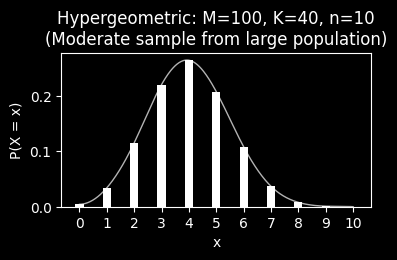

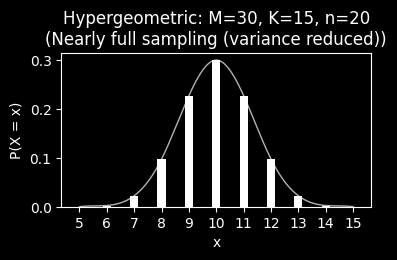

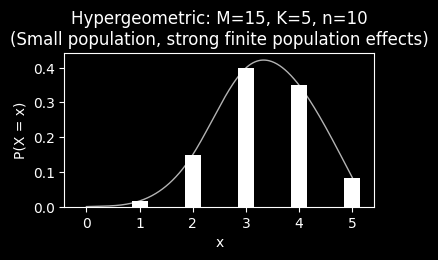

In [72]:
plot_hypergeometric_pmf(M=100, K=40, n=10, note="Moderate sample from large population")
plot_hypergeometric_pmf(M=30, K=15, n=20, note="Nearly full sampling (variance reduced)")
plot_hypergeometric_pmf(M=15, K=5, n=10, note="Small population, strong finite population effects")

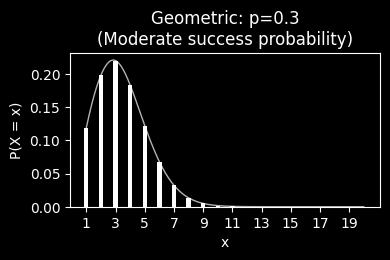

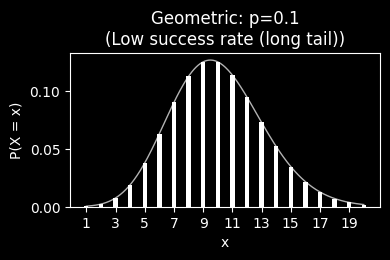

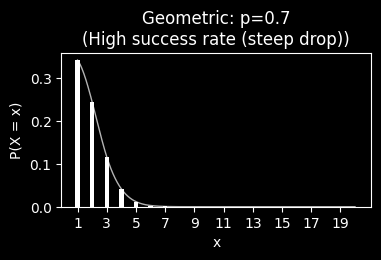

In [73]:
plot_geometric_pmf(p=0.3, note="Moderate success probability")
plot_geometric_pmf(p=0.1, note="Low success rate (long tail)")
plot_geometric_pmf(p=0.7, note="High success rate (steep drop)")

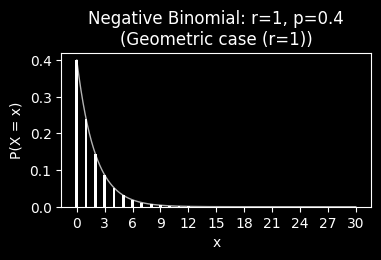

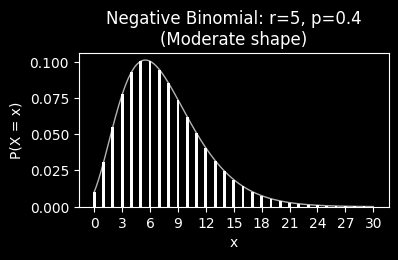

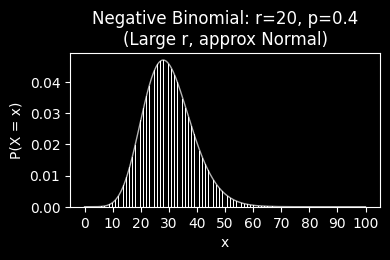

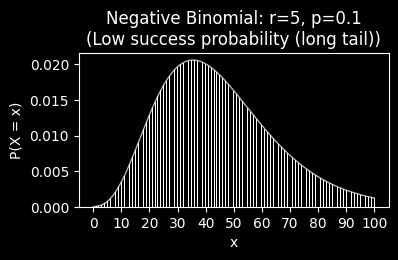

In [74]:
plot_negativebinomial_pmf(r=1, p=0.4, x_max_plot=30, note="Geometric case (r=1)")
plot_negativebinomial_pmf(r=5, p=0.4, x_max_plot=30, note="Moderate shape")
plot_negativebinomial_pmf(r=20, p=0.4, x_max_plot=100, note="Large r, approx Normal")
plot_negativebinomial_pmf(r=5, p=0.1, x_max_plot=100, note="Low success probability (long tail)")

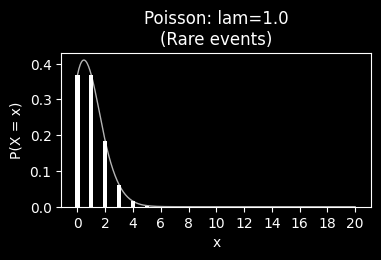

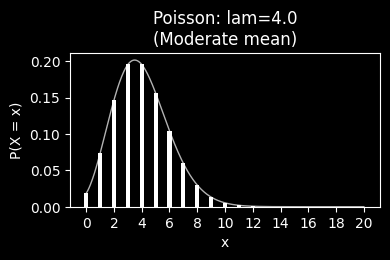

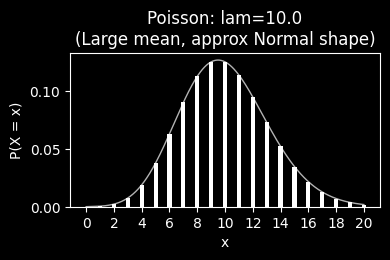

In [75]:
plot_poisson_pmf(lam=1.0, note="Rare events")
plot_poisson_pmf(lam=4.0, note="Moderate mean")
plot_poisson_pmf(lam=10.0, note="Large mean, approx Normal shape")

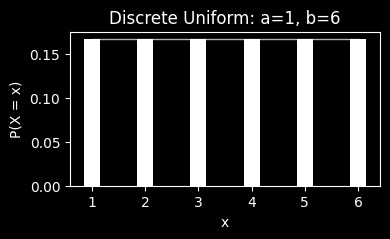

In [76]:
plot_discrete_uniform_pmf(a=1, b=6)

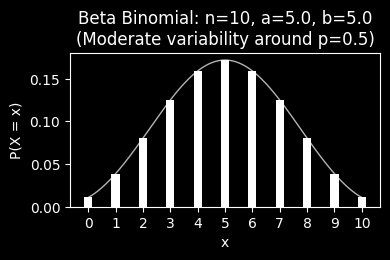

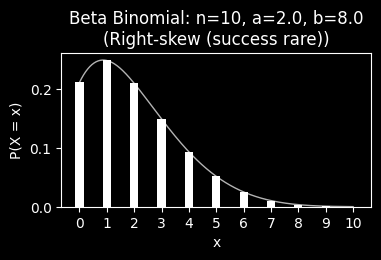

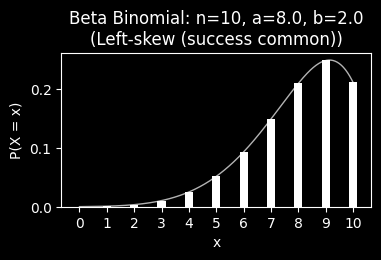

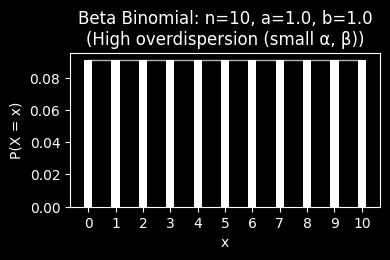

In [77]:
plot_betabinomial_pmf(n=10, a=5.0, b=5.0, note="Moderate variability around p=0.5")
plot_betabinomial_pmf(n=10, a=2.0, b=8.0, note="Right-skew (success rare)")
plot_betabinomial_pmf(n=10, a=8.0, b=2.0, note="Left-skew (success common)")
plot_betabinomial_pmf(n=10, a=1.0, b=1.0, note="High overdispersion (small α, β)")

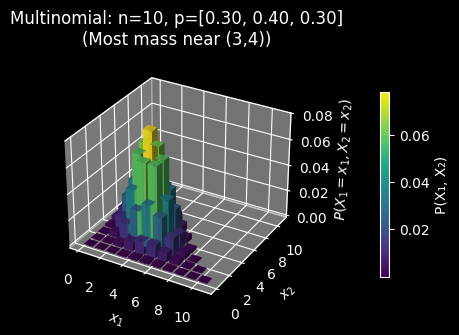

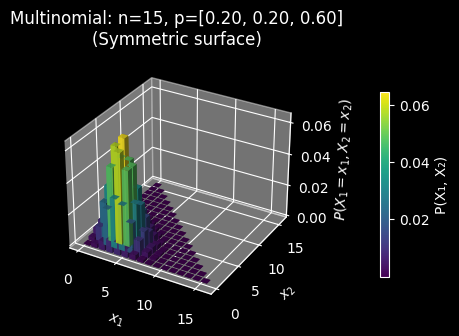

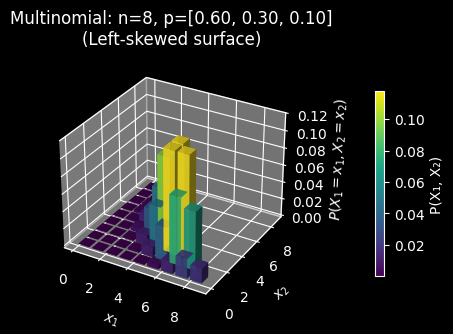

In [78]:
plot_multinomial_pmf(n=10, p1=0.3, p2=0.4, note="Most mass near (3,4)")
plot_multinomial_pmf(n=15, p1=0.2, p2=0.2, note="Symmetric surface")
plot_multinomial_pmf(n=8, p1=0.6, p2=0.3, note="Left-skewed surface")

# Continuous

In [79]:
def plot_pdf(x, pdf, title, dark=True, ylim=None, out=None, show=True):
    if dark:
        plt.style.use('dark_background')  # go to dark mode
        line_color = "white"
    else:
        line_color = "black"
    plt.figure(figsize=(4, 2))
    plt.plot(x, pdf, color=line_color, lw=2)
    # plt.fill_between(x, pdf, color="gray", alpha=0.15)
    plt.title(title)
    plt.xlabel("x")
    plt.ylabel("f(x)")
    if ylim is not None:
        plt.ylim(0, ylim)
    if dark:
        plt.style.use('default')
    if out:
        if os.path.dirname(out):
            os.makedirs(os.path.dirname(out), exist_ok=True)
        plt.savefig(out, bbox_inches='tight')
    if show:
        plt.show()
    else:
        plt.close()

@validate_call
def plot_uniform_pdf(
    a: Annotated[float, Field(description="Lower bound")],
    b: Annotated[float, Field(description="Upper bound")],
    ylim=None, note=None, dark = True, out=True
):
    if b <= a:
        raise ValueError(f"Invalid bounds: require b > a, got a={a}, b={b}")

    x = np.linspace(a - (b - a) * 0.1, b + (b - a) * 0.1, 400)
    pdf = uniform.pdf(x, loc=a, scale=b - a)
    title = f"Uniform: a={a}, b={b}"
    if note:
        title += f"\n({note})"
    if out is True:
        out = f"{OUT_DIR}/uniform_pdf_a{a:.2f}_b{b:.2f}".replace(".", "") + ".pdf"
    plot_pdf(x, pdf, title, ylim=ylim, dark=dark, out=out)

@validate_call
def plot_normal_pdf(
    mu: Annotated[float, Field(description="Mean (μ)")],
    sigma: Annotated[float, Field(gt=0, description="Standard deviation (σ)")],
    ylim=None, note=None, dark = True, out=True
):
    x = np.linspace(mu - 4*sigma, mu + 4*sigma, 400)
    pdf = norm.pdf(x, mu, sigma)
    title = f"Normal: μ={mu}, σ={sigma}"
    if note:
        title += f"\n({note})"
    if out is True:
        out = f"{OUT_DIR}/normal_pdf_mu{mu:.2f}_sigma{sigma:.2f}".replace(".", "") + ".pdf"
    plot_pdf(x, pdf, title, ylim=ylim, dark=dark, out=out)

@validate_call
def plot_exponential_pdf(
    lam: Annotated[float, Field(gt=0, description="Rate parameter (λ)")],
    ylim=None, note=None, dark = True, out=True
):
    x = np.linspace(0, 10/lam, 400)
    pdf = expon.pdf(x, scale=1/lam)
    title = f"Exponential: λ={lam}"
    if note:
        title += f"\n({note})"
    if out is True:
        out = f"{OUT_DIR}/exponential_pdf_lam{lam:.2f}".replace(".", "") + ".pdf"
    plot_pdf(x, pdf, title, ylim=ylim, dark=dark, out=out)

@validate_call
def plot_gamma_pdf(
    k: Annotated[float, Field(gt=0, description="Shape parameter (k)")],
    theta: Annotated[float, Field(gt=0, description="Scale parameter (θ)")],
    ylim=None, note=None, dark = True, out=True
):
    x = np.linspace(0, k * theta * 4, 400)
    pdf = gamma.pdf(x, a=k, scale=theta)
    title = f"Gamma: k={k}, θ={theta}"
    if note:
        title += f"\n({note})"
    if out is True:
        out = f"{OUT_DIR}/gamma_pdf_k{k:.2f}_theta{theta:.2f}".replace(".", "") + ".pdf"
    plot_pdf(x, pdf, title, ylim=ylim, dark=dark, out=out)

@validate_call
def plot_beta_pdf(
    a: Annotated[float, Field(gt=0, description="Alpha parameter (α)")],
    b: Annotated[float, Field(gt=0, description="Beta parameter (β)")],
    ylim=None, note=None, dark = True, out=True
):
    x = np.linspace(0, 1, 400)
    pdf = beta.pdf(x, a, b)
    title = f"Beta: α={a}, β={b}"
    if note:
        title += f"\n({note})"
    if out is True:
        out = f"{OUT_DIR}/beta_pdf_a{a:.2f}_b{b:.2f}".replace(".", "") + ".pdf"
    plot_pdf(x, pdf, title, ylim=ylim, dark=dark, out=out)

@validate_call
def plot_weibull_pdf(
    k: Annotated[float, Field(gt=0, description="Shape parameter (k)")],
    scale: Annotated[float, Field(gt=0, description="Scale parameter (λ)")],
    ylim=None, note=None, dark = True, out=True
):
    x = np.linspace(0, scale * 5, 400)
    pdf = weibull_min.pdf(x, c=k, scale=scale)
    title = f"Weibull: k={k}, λ={scale}"
    if note:
        title += f"\n({note})"
    if out is True:
        out = f"{OUT_DIR}/weibull_pdf_k{k:.2f}_scale{scale:.2f}".replace(".", "") + ".pdf"
    plot_pdf(x, pdf, title, ylim=ylim, dark=dark, out=out)


@validate_call
def plot_pareto_pdf(
    alpha: Annotated[float, Field(gt=0, description="Shape parameter (α)")],
    xm: Annotated[float, Field(gt=0, description="Scale parameter (xₘ)")],
    ylim=None, note=None, dark = True, out=True
):
    x = np.linspace(xm, xm * 10, 400)
    pdf = pareto.pdf(x, b=alpha, scale=xm)
    title = f"Pareto: α={alpha}, xₘ={xm}"
    if note:
        title += f"\n({note})"
    if out is True:
        out = f"{OUT_DIR}/pareto_pdf_a{alpha:.2f}_xm{xm:.2f}".replace(".", "") + ".pdf"
    if ylim is None:
        ylim = alpha
    plot_pdf(x, pdf, title, ylim=ylim, dark=dark, out=out)


@validate_call
def plot_cauchy_pdf(
    x0: Annotated[float, Field(description="Location (x₀)")],
    gamma_: Annotated[float, Field(gt=0, description="Scale parameter (γ)")],
    xrange_plot=(None, None), ylim=None, note=None, dark=True, out=True
):
    xrange_plot = list(xrange_plot)
    if xrange_plot[0] is None:
        xrange_plot[0] = x0 - 10 * gamma_
    if xrange_plot[1] is None:
        xrange_plot[1] = x0 + 10 * gamma_
    x = np.linspace(xrange_plot[0], xrange_plot[1], 400)
    pdf = cauchy.pdf(x, loc=x0, scale=gamma_)
    title = f"Cauchy: x₀={x0}, γ={gamma_}"
    if note:
        title += f"\n({note})"
    if out is True:
        out = f"{OUT_DIR}/cauchy_pdf_x0{x0:.2f}_gamma{gamma_:.2f}".replace(".", "") + ".pdf"
    plot_pdf(x, pdf, title, ylim=ylim, dark=dark, out=out)


@validate_call
def plot_logistic_pdf(
    mu: Annotated[float, Field(description="Location (μ)")],
    s: Annotated[float, Field(gt=0, description="Scale parameter (s)")],
    xrange_plot=(None, None), ylim=None, note=None, dark = True, out=True
):
    if xrange_plot[0] is None:
        xrange_plot = (mu - 6*s, xrange_plot[1])
    if xrange_plot[1] is None:
        xrange_plot = (xrange_plot[0], mu + 6*s)
    x = np.linspace(xrange_plot[0], xrange_plot[1], 400)
    pdf = logistic.pdf(x, loc=mu, scale=s)
    title = f"Logistic: μ={mu}, s={s}"
    if note:
        title += f"\n({note})"
    if out is True:
        out = f"{OUT_DIR}/logistic_pdf_mu{mu:.2f}_s{s:.2f}".replace(".", "") + ".pdf"
    plot_pdf(x, pdf, title, ylim=ylim, dark=dark, out=out)


@validate_call
def plot_lognormal_pdf(
    mu: Annotated[float, Field(description="Underlying normal mean (μ)")],
    sigma: Annotated[float, Field(gt=0, description="Underlying normal std (σ)")],
    ylim=None, note=None, dark = True, out=True
):
    x = np.linspace(0, np.exp(mu + 4*sigma), 400)
    pdf = lognorm.pdf(x, s=sigma, scale=np.exp(mu))
    title = f"Lognormal: μ={mu}, σ={sigma}"
    if note:
        title += f"\n({note})"
    if out is True:
        out = f"{OUT_DIR}/lognormal_pdf_mu{mu:.2f}_sigma{sigma:.2f}".replace(".", "") + ".pdf"
    plot_pdf(x, pdf, title, ylim=ylim, dark=dark, out=out)


@validate_call
def plot_t_pdf(
    df_: Annotated[float, Field(gt=0, description="Degrees of freedom (ν)")],
    ylim=None, note=None, dark = True, out=True
):
    x = np.linspace(-6, 6, 400)
    pdf = t.pdf(x, df_)
    title = f"Student-t: ν={df_}"
    if note:
        title += f"\n({note})"
    if out is True:
        out = f"{OUT_DIR}/t_pdf_df{df_:.2f}".replace(".", "") + ".pdf"
    plot_pdf(x, pdf, title, ylim=ylim, dark=dark, out=out)


@validate_call
def plot_chi2_pdf(
    k: Annotated[float, Field(gt=0, description="Degrees of freedom (k)")],
    ylim=None, note=None, dark = True, out=True
):
    x = np.linspace(0, k * 5, 400)
    pdf = chi2.pdf(x, df=k)
    title = f"Chi-squared: k={k}"
    if note:
        title += f"\n({note})"
    if out is True:
        out = f"{OUT_DIR}/chi2_pdf_k{k:.2f}".replace(".", "") + ".pdf"
    plot_pdf(x, pdf, title, ylim=ylim, dark=dark, out=out)

@validate_call
def plot_multivariate_normal_pdf(
    mu_x: Annotated[float, Field(description="Mean of X")],
    mu_y: Annotated[float, Field(description="Mean of Y")],
    sigma_x: Annotated[float, Field(gt=0, description="Std dev of X")],
    sigma_y: Annotated[float, Field(gt=0, description="Std dev of Y")],
    rho: Annotated[float, Field(ge=-0.999, le=0.999, description="Correlation coefficient")],
    note: str | None = None,
    dark: bool = True,
    out: bool | str = True,
    show: bool = True
):
    """Plot 3D surface of a 2D multivariate normal PDF."""

    # Mean vector and covariance matrix
    mu = np.array([mu_x, mu_y])
    cov = np.array([
        [sigma_x**2, rho * sigma_x * sigma_y],
        [rho * sigma_x * sigma_y, sigma_y**2]
    ])
    dist = multivariate_normal(mean=mu, cov=cov)

    # Create grid
    x = np.linspace(mu_x - 4 * sigma_x, mu_x + 4 * sigma_x, 150)
    y = np.linspace(mu_y - 4 * sigma_y, mu_y + 4 * sigma_y, 150)
    X, Y = np.meshgrid(x, y)
    pos = np.dstack((X, Y))
    Z = dist.pdf(pos)

    # Plot
    if dark:
        plt.style.use('dark_background')  # go to dark mode
    fig = plt.figure(figsize=(5, 4))
    ax = fig.add_subplot(111, projection='3d')

    norm = mcolors.Normalize(vmin=np.min(Z), vmax=np.max(Z))
    surf = ax.plot_surface(X, Y, Z, cmap='viridis', linewidth=0, antialiased=True, alpha=0.9)

    ax.set_xlabel("$x$")
    ax.set_ylabel("$y$")
    ax.set_zlabel("$f(x, y)$")

    title = f"Multivariate Normal: μ=({mu_x}, {mu_y}), σ=({sigma_x}, {sigma_y}), ρ={rho}"
    if note:
        title += f"\n({note})"
    ax.set_title(title, pad=10)

    fig.colorbar(surf, ax=ax, shrink=0.6, pad=0.2, label="PDF height")

    if dark:
        plt.style.use('default')  # revert back

    # Output
    if out is True:
        out = f"{OUT_DIR}/mvnormal_pdf_mu{mu_x:.2f}_{mu_y:.2f}_rho{rho:.2f}".replace(".", "") + ".pdf"
    if out:
        import os
        if os.path.dirname(out):
            os.makedirs(os.path.dirname(out), exist_ok=True)
        plt.savefig(out, bbox_inches="tight")

    if show:
        plt.show()
    else:
        plt.close()

@validate_call
def plot_dirichlet_pdf(
    a1: Annotated[float, Field(gt=0, description="α₁")],
    a2: Annotated[float, Field(gt=0, description="α₂")],
    a3: Annotated[float, Field(gt=0, description="α₃")],
    note: str | None = None,
    dark: bool = True,
    out: bool | str = True,
    show: bool = True
):
    alpha = np.array([a1, a2, a3])
    dist = dirichlet(alpha)
    title = f"Dirichlet: α=[{a1:.2f}, {a2:.2f}, {a3:.2f}]"
    if note:
        title += f"\n({note})"

    # Create simplex grid
    grid_points = 150
    x = np.linspace(0, 1, grid_points)
    y = np.linspace(0, 1, grid_points)
    X, Y = np.meshgrid(x, y)

    mask = (X + Y) < 1
    X_valid = X[mask]
    Y_valid = Y[mask]
    Z_valid = 1 - X_valid - Y_valid

    # ✅ Correct shape for SciPy: (k, n)
    pts = np.vstack([X_valid, Y_valid, Z_valid])
    pdf = dist.pdf(pts)  # shape: (n,)

    # === Plot 3D surface ===
    if dark:
        plt.style.use('dark_background')  # go to dark mode
    fig = plt.figure(figsize=(5, 4))
    ax = fig.add_subplot(111, projection="3d")

    norm = mcolors.Normalize(vmin=np.min(pdf), vmax=np.max(pdf))
    ax.plot_trisurf(X_valid, Y_valid, pdf, cmap="plasma", linewidth=0.05, antialiased=True, alpha=0.95)

    ax.set_xlabel("$x_1$")
    ax.set_ylabel("$x_2$")
    ax.set_zlabel("$f(x_1, x_2)$")
    ax.set_title(title, pad=10)

    mappable = cm.ScalarMappable(norm=norm, cmap="plasma")
    fig.colorbar(mappable, ax=ax, shrink=0.6, pad=0.2, label="PDF density")

    if dark:
        plt.style.use('default')  # revert back

    if out is True:
        out = f"{OUT_DIR}/dirichlet_pdf_a{a1:.2f}_{a2:.2f}_{a3:.2f}".replace(".", "") + ".pdf"
    if out:
        if os.path.dirname(out):
            os.makedirs(os.path.dirname(out), exist_ok=True)
        plt.savefig(out, bbox_inches="tight")

    if show:
        plt.show()
    else:
        plt.close()

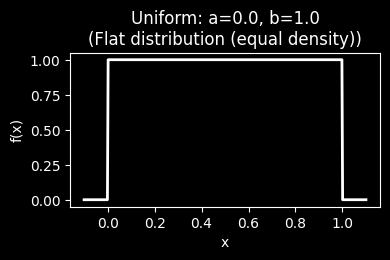

In [80]:
plot_uniform_pdf(0, 1, note="Flat distribution (equal density)")

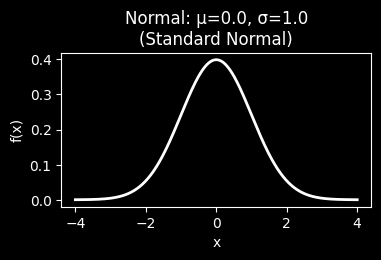

In [81]:
plot_normal_pdf(0, 1, note="Standard Normal")

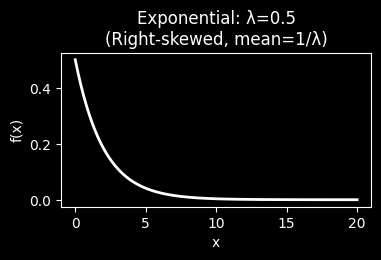

In [82]:
plot_exponential_pdf(0.5, note="Right-skewed, mean=1/λ")

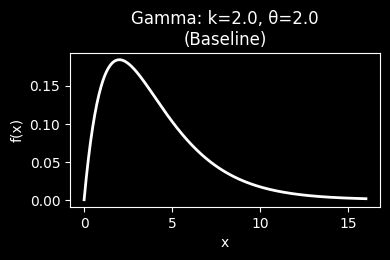

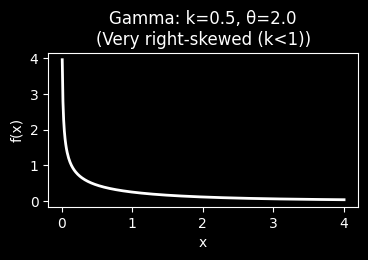

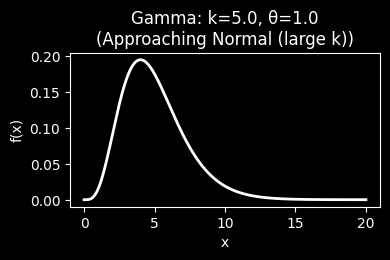

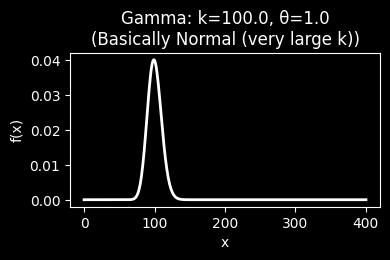

In [83]:
plot_gamma_pdf(2, 2, note="Baseline")
plot_gamma_pdf(0.5, 2, note="Very right-skewed (k<1)")
plot_gamma_pdf(5, 1, note="Approaching Normal (large k)")
plot_gamma_pdf(100, 1, note="Basically Normal (very large k)")

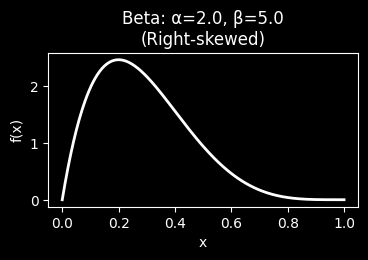

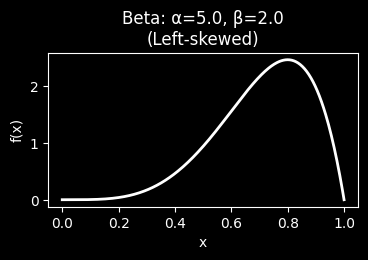

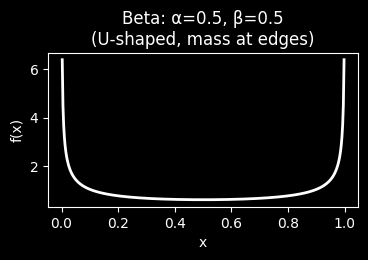

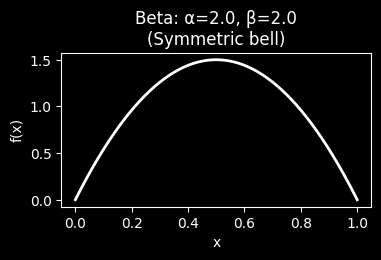

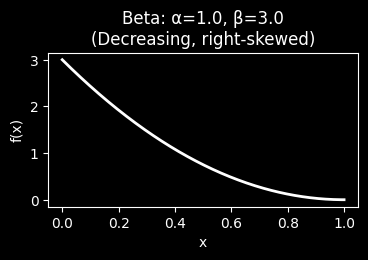

In [84]:
plot_beta_pdf(2, 5, note="Right-skewed")
plot_beta_pdf(5, 2, note="Left-skewed")
plot_beta_pdf(0.5, 0.5, note="U-shaped, mass at edges")
plot_beta_pdf(2, 2, note="Symmetric bell")
plot_beta_pdf(1, 3, note="Decreasing, right-skewed")

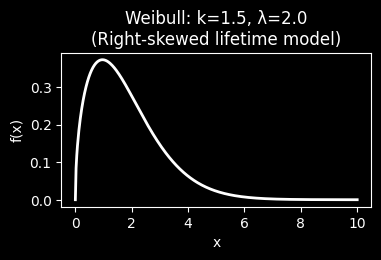

/Users/joeyrich/miniconda3/envs/pydicom_env/lib/python3.10/site-packages/scipy/stats/_continuous_distns.py:2757: RuntimeWarning: divide by zero encountered in power
  return c*pow(x, c-1)*np.exp(-pow(x, c))


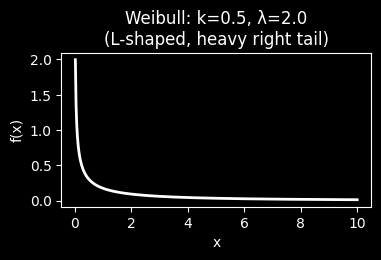

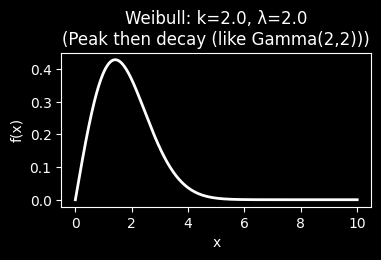

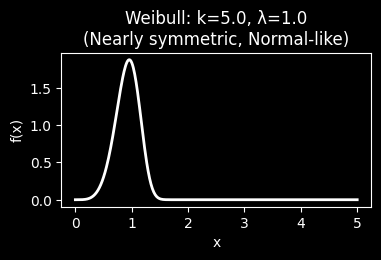

In [85]:
plot_weibull_pdf(1.5, 2, note="Right-skewed lifetime model")
plot_weibull_pdf(0.5, 2, note="L-shaped, heavy right tail")
plot_weibull_pdf(2, 2, note="Peak then decay (like Gamma(2,2))")
plot_weibull_pdf(5, 1, note="Nearly symmetric, Normal-like")

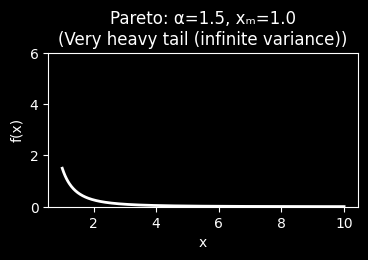

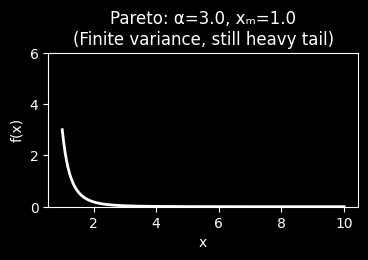

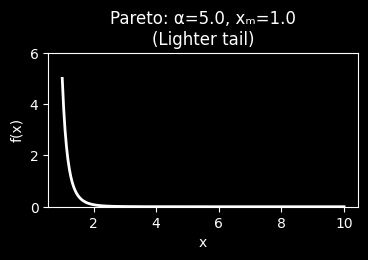

In [86]:
plot_pareto_pdf(1.5, 1, ylim=6, note="Very heavy tail (infinite variance)")
plot_pareto_pdf(3, 1, ylim=6, note="Finite variance, still heavy tail")
plot_pareto_pdf(5, 1, ylim=6, note="Lighter tail")

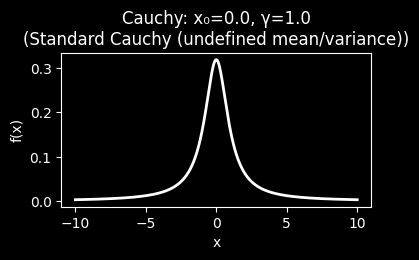

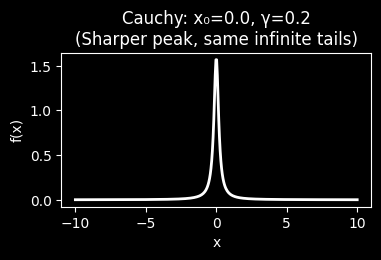

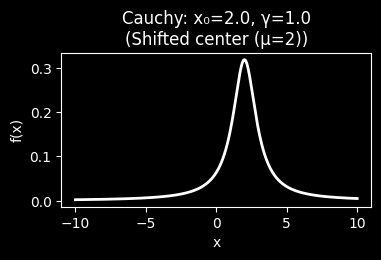

In [87]:
plot_cauchy_pdf(0, 1, xrange_plot=(-10, 10), note="Standard Cauchy (undefined mean/variance)")
plot_cauchy_pdf(0, 0.2, xrange_plot=(-10, 10), note="Sharper peak, same infinite tails")
plot_cauchy_pdf(2, 1, xrange_plot=(-10, 10), note="Shifted center (μ=2)")

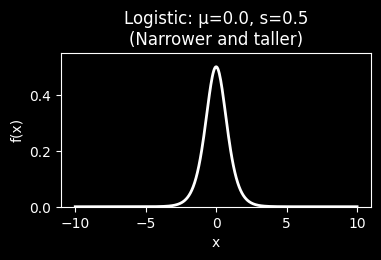

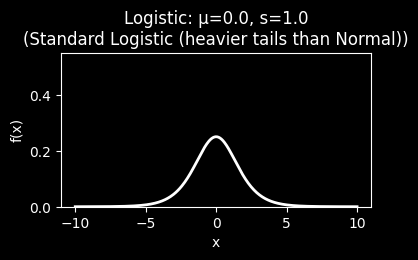

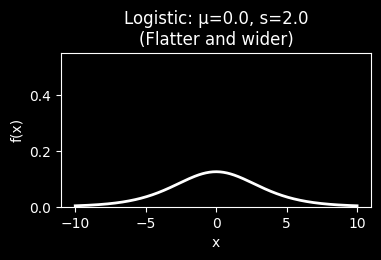

In [88]:
plot_logistic_pdf(0, 0.5, ylim=0.55, xrange_plot=(-10, 10), note="Narrower and taller")
plot_logistic_pdf(0, 1, ylim=0.55, xrange_plot=(-10, 10), note="Standard Logistic (heavier tails than Normal)")
plot_logistic_pdf(0, 2, ylim=0.55, xrange_plot=(-10, 10), note="Flatter and wider")

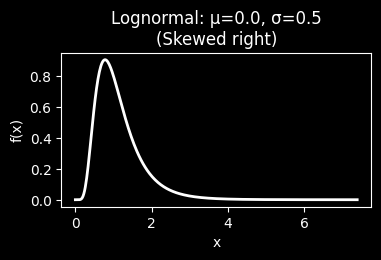

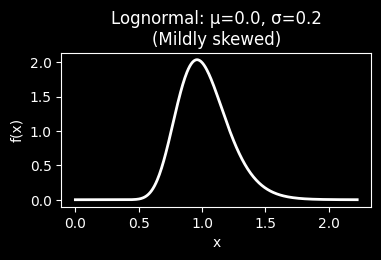

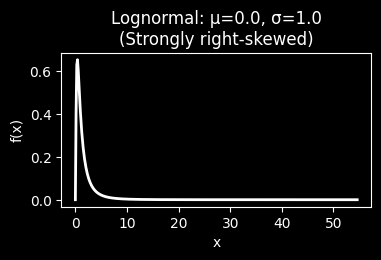

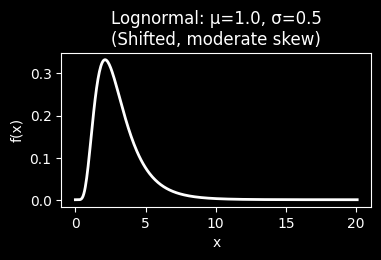

In [89]:
plot_lognormal_pdf(0, 0.5, note="Skewed right")
plot_lognormal_pdf(0, 0.2, note="Mildly skewed")
plot_lognormal_pdf(0, 1.0, note="Strongly right-skewed")
plot_lognormal_pdf(1, 0.5, note="Shifted, moderate skew")

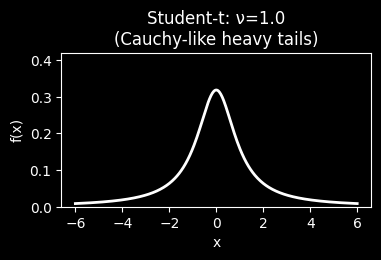

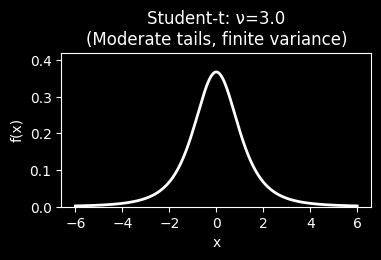

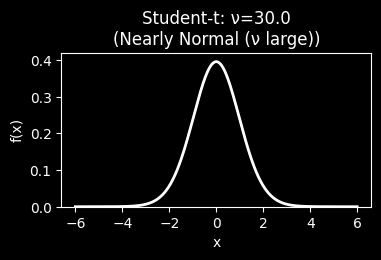

In [90]:
plot_t_pdf(1, ylim=0.42, note="Cauchy-like heavy tails")
plot_t_pdf(3, ylim=0.42, note="Moderate tails, finite variance")
plot_t_pdf(30, ylim=0.42, note="Nearly Normal (ν large)")

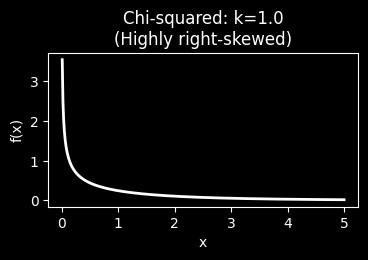

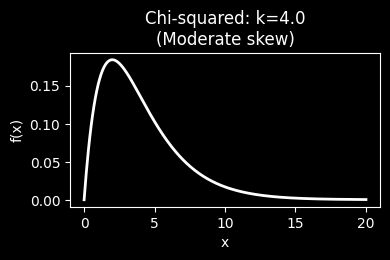

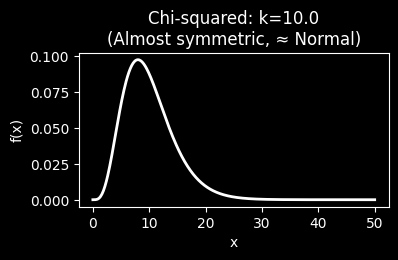

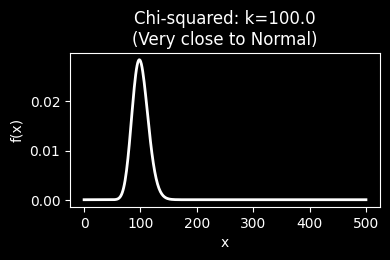

In [91]:
plot_chi2_pdf(1, note="Highly right-skewed")
plot_chi2_pdf(4, note="Moderate skew")
plot_chi2_pdf(10, note="Almost symmetric, ≈ Normal")
plot_chi2_pdf(100, note="Very close to Normal")

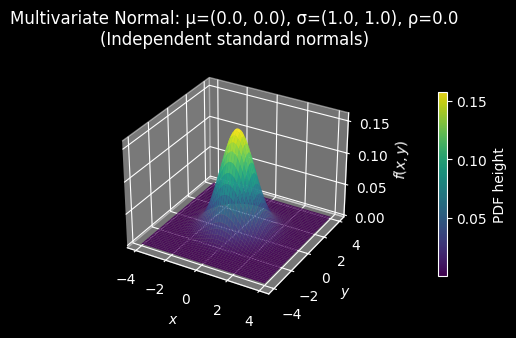

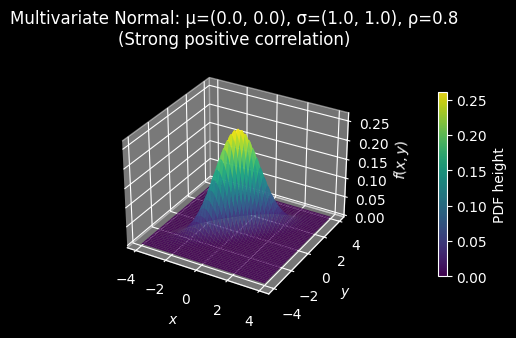

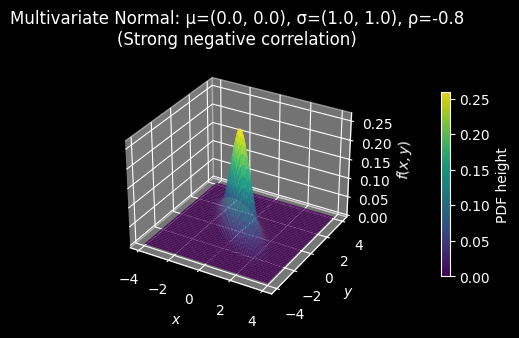

In [92]:
plot_multivariate_normal_pdf(mu_x=0, mu_y=0, sigma_x=1, sigma_y=1, rho=0.0, note="Independent standard normals")
plot_multivariate_normal_pdf(mu_x=0, mu_y=0, sigma_x=1, sigma_y=1, rho=0.8, note="Strong positive correlation")
plot_multivariate_normal_pdf(mu_x=0, mu_y=0, sigma_x=1, sigma_y=1, rho=-0.8, note="Strong negative correlation")

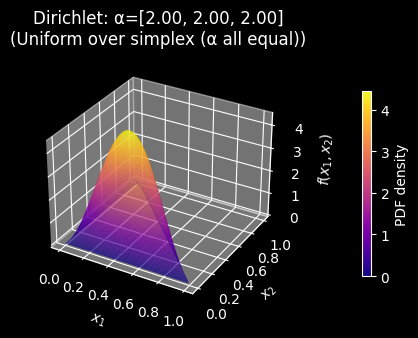

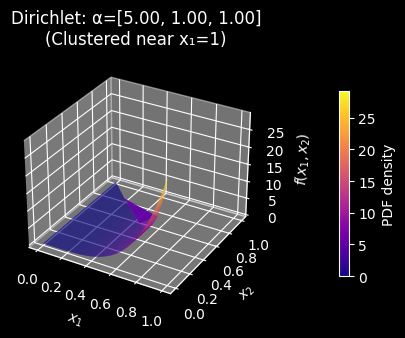

In [93]:
plot_dirichlet_pdf(2, 2, 2, note="Uniform over simplex (α all equal)")
plot_dirichlet_pdf(5, 1, 1, note="Clustered near x₁=1")